Due to the current situation (`Updated 09/02/2026`),

- Google Gemini has reduced the rate limits for several models, such as `gemini-2.5-flash` and `gemini-3-flash` (text models used in Colab notebooks), to a **limit of 20 Requests Per Day (RPD)**.

- To continue using these models seamlessly with sufficient rate limits, it is necessary to upgrade to the **pay-as-you-go tier** (link a Billing Account).
  - 👉 You can learn how to do this here: [https://ai.google.dev/gemini-api/docs/billing](https://ai.google.dev/gemini-api/docs/billing)

- Alternatively, you can follow the Groq API approach described below.

Using Gemini, Learning LangChain Framework and Tracking with LangSmith

REF : https://python.langchain.com/docs/integrations/chat/google_generative_ai/

## LangSmith Setting

To enable automated tracing of your model calls, **set your LangSmith API key**:

1. Create an account

      Sign up at [smith.langchain.com](https://smith.langchain.com) (no credit card required). You can log in with Google, GitHub, or email.

2. Create an API key
      
      Go to `Settings` → `API Keys` → `Create API Key`. Copy the key and save it securely.

In [1]:
!pip install -q langchain_core

Just run this line, LangSmith will automatically track your runs.

In [2]:
import os
os.environ["LANGSMITH_TRACING"] = "true"

In [3]:
import getpass
os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")

Enter your LangSmith API key: ··········


Set project name to show in the LangSmith WebUI.

In [4]:
os.environ['LANGSMITH_PROJECT'] = "DSDE-test"

All LLM executions in this Google Colab will be logged on the LangSmith website.

## Approach 1: Gemini

In [24]:
%%capture
!pip install -qU langchain-google-genai

Request for Google API KEY here : https://aistudio.google.com/app/apikey

In [22]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


Create a model

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

## Approach 2: Groq API


However, we still have an **alternative** that can be used via a free-tier API: **Groq API** (compatible with LangChain). This does not require linking a credit card and offers several models, such as:

- `llama-3.1-8b-instant` (Rate limit: 30 RPM, 14.4K RPD) *RPM = Requests Per Minute, RPD = Requests Per Day
- `llama-3.3-70b-versatile` (Rate limit: 30 RPM, 1K RPD)
- Other available models: https://console.groq.com/settings/limits

*(RPM = Requests Per Minute, TPM = Tokens Per Minute)*

👉 You can sign up and get your API Key here: [https://console.groq.com/keys](https://console.groq.com/keys)


In [5]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 6.8 MB/s eta 0:00:00


In [6]:
import getpass
import os

os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [7]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant", # can change
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

###Playground

In this section, we will experiment and check the logs in the LangSmith UI afterward to observe the results.

####Simple Invocation

In [8]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='The translation of "I love programming" to French is:\n\n"J\'adore le programmation."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 55, 'total_tokens': 77, 'completion_time': 0.085137669, 'completion_tokens_details': None, 'prompt_time': 0.002779509, 'prompt_tokens_details': None, 'queue_time': 0.088158033, 'total_time': 0.087917178}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c41d9-cb55-7242-b3c6-606d3a9b1892-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 55, 'output_tokens': 22, 'total_tokens': 77})

In [9]:
print(ai_msg.content)

The translation of "I love programming" to French is:

"J'adore le programmation."


- Check automated log in LangSmith website.

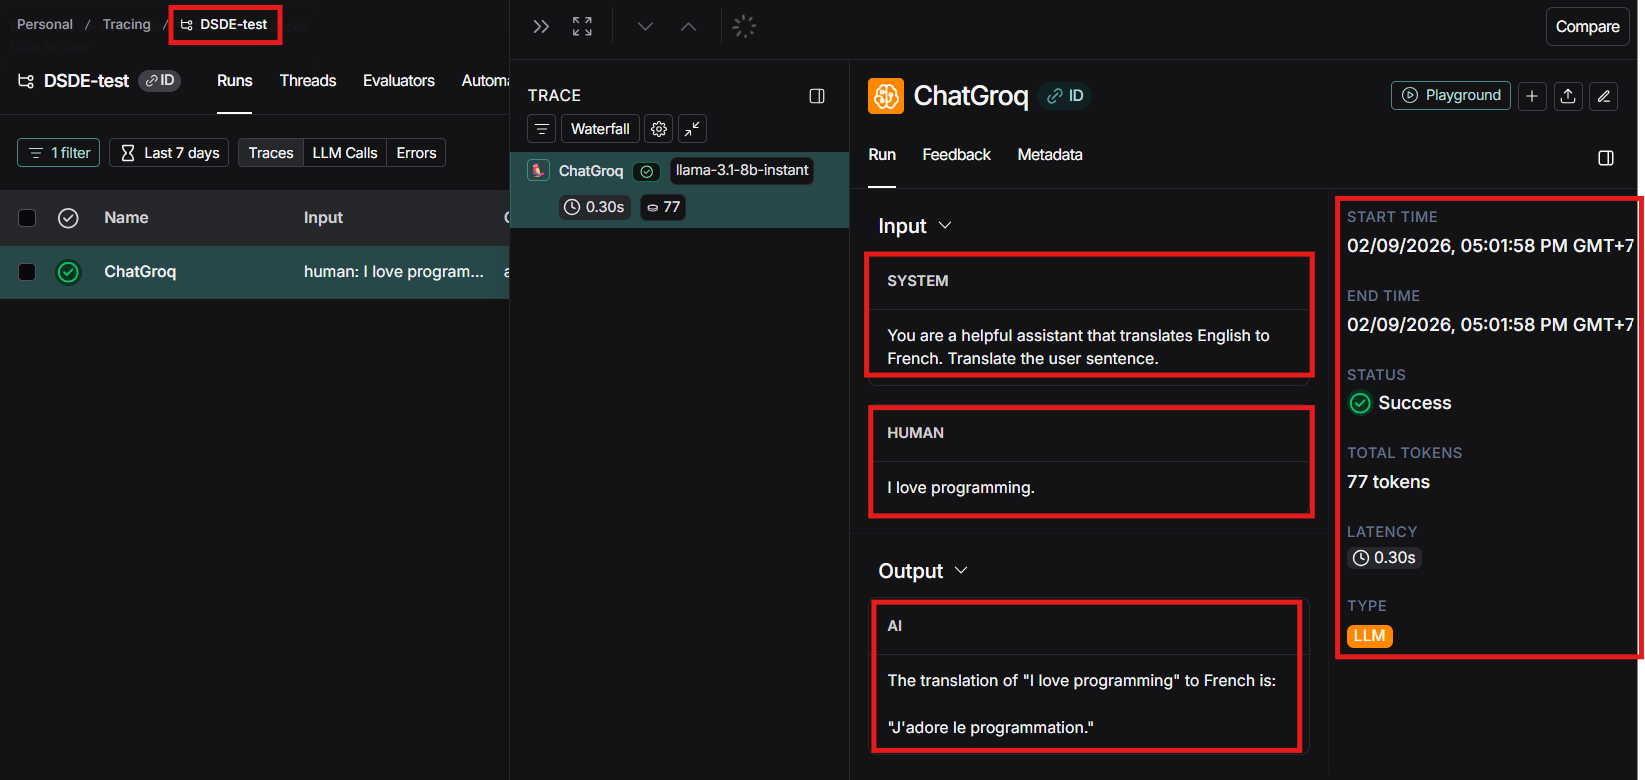

####Chaining

- LangChain supports pipe operator.
- ex. `prompt | llm`

  - Receive input from the user → insert it into the prompt (template/formatter)
  - The result from the prompt → is passed to the LLM (model)
  - The output from the model → becomes the final answer

In [10]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(  # prompt template contains three fields : input_language, output_language, input
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm # this line !
chain.invoke(
    {
        "input_language": "English", # this input_language from user is passed into defined prompt template, in this case, input_language = 'English'
        "output_language": "German", # this output_language from user is passed into defined prompt template, in this case, input_language = 'German'
        "input": "I love programming.", # this input from user is passed into defined prompt template, in this case, input_language = 'I love programming'
    }
)

AIMessage(content='Ich liebe Programmieren. \n\n(Breakdown: \n- "I" is translated to "Ich"\n- "love" is translated to "liebe"\n- "programming" is translated to "Programmieren")', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 50, 'total_tokens': 95, 'completion_time': 0.085215834, 'completion_tokens_details': None, 'prompt_time': 0.037911955, 'prompt_tokens_details': None, 'queue_time': 0.098110338, 'total_time': 0.123127789}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c41db-7c30-71c1-bc0e-0b0a0619a55b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 45, 'total_tokens': 95})

###Token Usage Tracking

In [26]:
result = llm.invoke("Explain the concept of prompt engineering in one sentence.")

print(result.content)
print("\nUsage Metadata:")
print(result.usage_metadata)

Prompt engineering is the practice of designing and refining inputs (prompts) to effectively guide AI models toward generating specific, desired, and optimal outputs.

Usage Metadata:
{'input_tokens': 11, 'output_tokens': 953, 'total_tokens': 964, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 924}}


### LLM with Function Calling (Custom Function)

This is the cycle when we use LLM with function calling via LangChain:
1. Human query is fed to the LLM.
2. LLM generates the input for the function.
3. The function return the result.
4. We combine all messages from 1 to 3
5. Another LLM recieves all messages that we combined in the step 4 and generates the final response.


- **Defined a Function**

In [27]:
from langchain_core.tools import tool

# Define the tool
@tool(description="Get the current weather in a given location")
def get_weather(location: str) -> str:
    return f"{location} --> it's sunny."

**(1) Human Input Query**

In [28]:
# Invoke the model with a query that should trigger the tool
query = "What's the weather in San Francisco?"

- LLM with Tool: LLM generates input for calling the function.

In [29]:
llm_with_tool = llm.bind_tools([get_weather])  # bind our LLM with defined tool

**(2) AI Message: Output from LLM with Tool // Input for calling a function**

In [30]:
ai_msg = llm_with_tool.invoke(query)
print(ai_msg)

content='' additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}, '__gemini_function_call_thought_signatures__': {'dbc281d3-fdd5-47c1-9a8e-4e0b981ece5d': 'CtEBAb4+9vv/8Vxx21qAbd9w0CYl27xalVw9xCxoHu2/fyoqFAyzWVqsxzSWVhVVigh2ck2D/nmq5bLyuIi1yUzvgoUdcYih0fvOXTjDeDgiJeluzzW4GBH0iW9NhfRWzcQaN8yzzUtkgs3iE7kKjEM7qX1cs8mtDH5iPTVx/zWW8RL/1/UwolXzgLs2+a5v5Wts+pKwoVyNCCpElS/3WI9qjnU0A3uevcF0k70XIG8y+ZSVy4AX1IXJn8TPpqQ9zB5AB2FbnaW3xFlU1J4oELr5L+k='}} response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--019c41e5-e95f-71c1-b530-37ea7afdd9cc-0' tool_calls=[{'name': 'get_weather', 'args': {'location': 'San Francisco'}, 'id': 'dbc281d3-fdd5-47c1-9a8e-4e0b981ece5d', 'type': 'tool_call'}] invalid_tool_calls=[] usage_metadata={'input_tokens': 50, 'output_tokens': 55, 'total_tokens': 105, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasonin

You have received a response structure like this:
- ```content='' additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}} ...```

- This indicates a function call message from the LLM, constructed to call the function with the input : **location = 'San Francisco'**.
The LLM has derived the function input from the user’s query automatically.

**(3) ToolMessage** = **Output that returned from the function.**

In [31]:
# Example tool call message would be needed here if you were actually running the tool
from langchain_core.messages import ToolMessage

function_input_from_llm = ai_msg.tool_calls[0]["args"]

tool_message = ToolMessage(
    content=get_weather.func(**function_input_from_llm),
    tool_call_id=ai_msg.tool_calls[0]["id"], #
)

In [32]:
tool_message

ToolMessage(content="San Francisco --> it's sunny.", tool_call_id='dbc281d3-fdd5-47c1-9a8e-4e0b981ece5d')

**(4) All messages are packed.**

In [33]:
all_messages = [HumanMessage(query), ai_msg, tool_message]
all_messages

[HumanMessage(content="What's the weather in San Francisco?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "San Francisco"}'}, '__gemini_function_call_thought_signatures__': {'dbc281d3-fdd5-47c1-9a8e-4e0b981ece5d': 'CtEBAb4+9vv/8Vxx21qAbd9w0CYl27xalVw9xCxoHu2/fyoqFAyzWVqsxzSWVhVVigh2ck2D/nmq5bLyuIi1yUzvgoUdcYih0fvOXTjDeDgiJeluzzW4GBH0iW9NhfRWzcQaN8yzzUtkgs3iE7kKjEM7qX1cs8mtDH5iPTVx/zWW8RL/1/UwolXzgLs2+a5v5Wts+pKwoVyNCCpElS/3WI9qjnU0A3uevcF0k70XIG8y+ZSVy4AX1IXJn8TPpqQ9zB5AB2FbnaW3xFlU1J4oELr5L+k='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c41e5-e95f-71c1-b530-37ea7afdd9cc-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'San Francisco'}, 'id': 'dbc281d3-fdd5-47c1-9a8e-4e0b981ece5d', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens'

**(5) The final answer will be generated.**

In [34]:
llm_with_tool.invoke(all_messages)  # Passing tool result back, let LLM create a final response

AIMessage(content='The weather in San Francisco is sunny.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c41e6-0ae9-7f51-bb8c-4c5d6a8594c4-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 88, 'output_tokens': 8, 'total_tokens': 96, 'input_token_details': {'cache_read': 0}})

###Multimodal Usage

#####Image

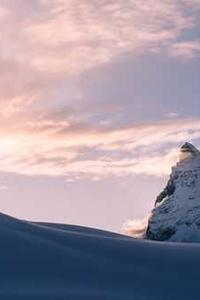

In [48]:
import base64 # for encoding an image file into a text-like format (base64)
import requests
from langchain_core.messages import HumanMessage

llm = ChatGroq(
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# or gemini instead
# llm = ChatGoogleGenerativeAI(
#     model="gemini-2.5-flash",
#     temperature=0,
#     max_tokens=None,
#     timeout=None,
#     max_retries=2,
# )

# 1. Download the image
image_url = "https://picsum.photos/seed/picsum/200/300"
response = requests.get(image_url)

if response.status_code == 200:
    # 2. Encode image content to base64
    image_data = base64.b64encode(response.content).decode('utf-8')

    # 3. Create the Data URI
    data_url = f"data:image/jpeg;base64,{image_data}"

    message_b64 = HumanMessage(
        content=[
            {
                "type": "text",
                "text": "Describe this image.",
            },
            {
                "type": "image_url",
                "image_url": {"url": data_url}, # Pass the Base64 data string
            },
        ]
    )

    try:
        result = llm.invoke([message_b64])
        print(f"Response: {result.content}")
    except Exception as e:
        print(f"Error: {e}")
else:
    print(f"Failed to download image. Status: {response.status_code}")

Response: This is a serene and majestic landscape photograph capturing a snow-covered mountain scene at either sunrise or sunset.

The upper two-thirds of the image are dominated by a soft, pastel sky. Wispy, elongated clouds are scattered across the frame, illuminated from below or within by a warm, gentle light, creating a gradient of soft pinks, purples, and pale oranges that blend into a lighter, almost clear blue-grey higher up.

On the right side of the midground, a towering, jagged mountain peak rises dramatically. Its slopes are heavily covered in pristine white snow, with some darker, rocky faces visible in the shadows. The very tip and the right-facing side of the mountain are brightly illuminated by the warm light of the sun, glowing a brilliant white and soft yellow, creating a stark contrast with the left-facing slopes which are cast in deep, cool blue shadows.

The foreground, occupying the bottom third of the image, consists of a vast expanse of gently rolling, undisturb

#####Audio

**This part is not supported in Approach 2: ChatGroq API. Please use Approach 1 for this step if you want.**

1. Download this audio file from Kaggle (https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download)
2. Upload the file into this Google Colab
3. Unzip the file using the code below

In [49]:
!unzip /content/*.zip

Archive:  /content/archive (1).zip
  inflating: harvard.wav             
  inflating: jackhammer.wav          


In [51]:
import base64 # for encoding an audio file into a text-like format (base64)
from langchain_core.messages import HumanMessage

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

audio_file_path = "harvard.wav"
audio_mime_type = "audio/wav" # change it to your audio file type

with open(audio_file_path, "rb") as audio_file:
    encoded_audio = base64.b64encode(audio_file.read()).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe the audio."},
        {
            "type": "media",
            "data": encoded_audio,  # Use base64 string directly
            "mime_type": audio_mime_type,
        },
    ]
)
response = llm.invoke([message])  # Uncomment to run
print(f"Response for audio: {response.content}")

Response for audio: The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.


### LLM with Google Search

**This part is not supported in Approach 2: Groq API. Please use Approach 1 for this step if you want.**

In [ ]:
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

model_with_search = llm.bind_tools([{"google_search": {}}]) # Binded with Prebuilt Tool (Google Search)
resp = model_with_search.invoke("When is the next total solar eclipse in US?",)

print(resp.content)

The next total solar eclipse in the United States will occur on March 30, 2033, and will be visible only in Alaska.

For the contiguous United States, the next total solar eclipse is expected on August 22, 2044, crossing parts of Montana, North Dakota, and South Dakota. Following that, a major total solar eclipse will traverse the entire country from northern California to Florida on August 12, 2045.


##### Bonus : Citations

* From the LLM response integrated with the Google Search tool, we obtain the positions of text segments that require citations.
* We can inspect the raw response and use the provided metadata to generate citations as a post-processing step.


In [ ]:
resp # raw response

AIMessage(content='The next total solar eclipse in the United States will occur on March 30, 2033, and will be visible only in Alaska.\n\nFor the contiguous United States, the next total solar eclipse is expected on August 22, 2044, crossing parts of Montana, North Dakota, and South Dakota. Following that, a major total solar eclipse will traverse the entire country from northern California to Florida on August 12, 2045.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {'google_maps_widget_context_token': None, 'grounding_chunks': [{'maps': None, 'retrieved_context': None, 'web': {'domain': None, 'title': 'wikipedia.org', 'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGF5DrsNiyhdK1zolf7M4JkQnTISsl0Fy0OD74wWR-Se4cb95CIKj6j8sEnxn2t1PayhRgSIA3DYfDr1k4xruFS8Zofy50d2sm1XRnVnDr-fKyskEl9un1aPDc284-14qN6rKtIfZrnlnm-WGUlgY_srmspmK_gtcKDHyJTBxjZCLMlE5BxghN_r8qFc9k='}}, {

- Google Search’s output includes metadata for citations (which we can use, but it requires some post-processing effort).

In [ ]:
resp.response_metadata

{'finish_reason': 'STOP',
 'model_name': 'gemini-2.5-flash',
 'safety_ratings': [],
 'grounding_metadata': {'google_maps_widget_context_token': None,
  'grounding_chunks': [{'maps': None,
    'retrieved_context': None,
    'web': {'domain': None,
     'title': 'wikipedia.org',
     'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGF5DrsNiyhdK1zolf7M4JkQnTISsl0Fy0OD74wWR-Se4cb95CIKj6j8sEnxn2t1PayhRgSIA3DYfDr1k4xruFS8Zofy50d2sm1XRnVnDr-fKyskEl9un1aPDc284-14qN6rKtIfZrnlnm-WGUlgY_srmspmK_gtcKDHyJTBxjZCLMlE5BxghN_r8qFc9k='}},
   {'maps': None,
    'retrieved_context': None,
    'web': {'domain': None,
     'title': 'space.com',
     'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHZMY-MZ05BMe5Vz7nVpSukCjSrKV_JXK8dqSmj-SYwzV93cHyKLL_qNnfQz07ToIsI6qNyMvdRjgqJCo8bCoofsEaJ3_rkXWF2dpLcqQSL5eKv47I3FEcaCoGrrP6kbIKXGqF4UlTvjCKWq85xjTja'}},
   {'maps': None,
    'retrieved_context': None,
    'web': {'domain': None,
     'title': 'almanac.com'

- Inspect `grouding_metadata` field

In [ ]:
resp.response_metadata['grounding_metadata']

{'google_maps_widget_context_token': None,
 'grounding_chunks': [{'maps': None,
   'retrieved_context': None,
   'web': {'domain': None,
    'title': 'wikipedia.org',
    'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGF5DrsNiyhdK1zolf7M4JkQnTISsl0Fy0OD74wWR-Se4cb95CIKj6j8sEnxn2t1PayhRgSIA3DYfDr1k4xruFS8Zofy50d2sm1XRnVnDr-fKyskEl9un1aPDc284-14qN6rKtIfZrnlnm-WGUlgY_srmspmK_gtcKDHyJTBxjZCLMlE5BxghN_r8qFc9k='}},
  {'maps': None,
   'retrieved_context': None,
   'web': {'domain': None,
    'title': 'space.com',
    'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHZMY-MZ05BMe5Vz7nVpSukCjSrKV_JXK8dqSmj-SYwzV93cHyKLL_qNnfQz07ToIsI6qNyMvdRjgqJCo8bCoofsEaJ3_rkXWF2dpLcqQSL5eKv47I3FEcaCoGrrP6kbIKXGqF4UlTvjCKWq85xjTja'}},
  {'maps': None,
   'retrieved_context': None,
   'web': {'domain': None,
    'title': 'almanac.com',
    'uri': 'https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGZXxBxAA0ZV1Kd_hsaf_ZGFWObsxOpYGOlgWLn

- In the `grounding_supports` we have `start_index` and `end_index` of each cited text (support).

In [ ]:
supports = resp.response_metadata['grounding_metadata']['grounding_supports']

In [ ]:
supports # indicates start_index, stop_index for sections, for citation

[{'confidence_scores': None,
  'grounding_chunk_indices': [0, 1],
  'segment': {'end_index': 115,
   'part_index': None,
   'start_index': None,
   'text': 'The next total solar eclipse in the United States will occur on March 30, 2033, and will be visible only in Alaska.'}},
 {'confidence_scores': None,
  'grounding_chunk_indices': [0, 2, 1],
  'segment': {'end_index': 270,
   'part_index': None,
   'start_index': 117,
   'text': 'For the contiguous United States, the next total solar eclipse is expected on August 22, 2044, crossing parts of Montana, North Dakota, and South Dakota.'}},
 {'confidence_scores': None,
  'grounding_chunk_indices': [2, 1],
  'segment': {'end_index': 403,
   'part_index': None,
   'start_index': 271,
   'text': 'Following that, a major total solar eclipse will traverse the entire country from northern California to Florida on August 12, 2045.'}}]

- Implement the `add_citations` function that
sorts the supports in descending order by index and adds the corresponding uri as inline citations to the response text.

In [ ]:
def add_citations(resp):
    text = resp.content
    supports = resp.response_metadata['grounding_metadata']['grounding_supports']
    chunks = resp.response_metadata['grounding_metadata']['grounding_chunks']

    # Sort supports by end_index in descending order to avoid shifting issues when inserting.
    sorted_supports = sorted(supports, key=lambda s: s['segment']['end_index'], reverse=True)

    for support in sorted_supports:
        end_index = support['segment']['end_index']
        if support['grounding_chunk_indices']:
            # Create citation string like [1](link1)[2](link2)
            citation_links = []
            for i in support['grounding_chunk_indices']:
                if i < len(chunks):
                    uri = chunks[i]['web']['uri']
                    citation_links.append(f"[{i + 1}]({uri})")

            citation_string = ", ".join(citation_links)
            text = text[:end_index] + citation_string + text[end_index:]

    return text

The response now includes citations.

In [ ]:
# Assuming response with grounding metadata
text_with_citations = add_citations(resp)
print(text_with_citations)

The next total solar eclipse in the United States will occur on March 30, 2033, and will be visible only in Alaska.[1](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGF5DrsNiyhdK1zolf7M4JkQnTISsl0Fy0OD74wWR-Se4cb95CIKj6j8sEnxn2t1PayhRgSIA3DYfDr1k4xruFS8Zofy50d2sm1XRnVnDr-fKyskEl9un1aPDc284-14qN6rKtIfZrnlnm-WGUlgY_srmspmK_gtcKDHyJTBxjZCLMlE5BxghN_r8qFc9k=), [2](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHZMY-MZ05BMe5Vz7nVpSukCjSrKV_JXK8dqSmj-SYwzV93cHyKLL_qNnfQz07ToIsI6qNyMvdRjgqJCo8bCoofsEaJ3_rkXWF2dpLcqQSL5eKv47I3FEcaCoGrrP6kbIKXGqF4UlTvjCKWq85xjTja)

For the contiguous United States, the next total solar eclipse is expected on August 22, 2044, crossing parts of Montana, North Dakota, and South Dakota.[1](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGF5DrsNiyhdK1zolf7M4JkQnTISsl0Fy0OD74wWR-Se4cb95CIKj6j8sEnxn2t1PayhRgSIA3DYfDr1k4xruFS8Zofy50d2sm1XRnVnDr-fKyskEl9un1aPDc284-14qN6rKtIfZrnlnm-WGUlgY_srmspmK_gtcKDHyJTB

### Check the LangSmith UI again:

- All runs will be traced and logged automatically in the LangSmith UI.
- Field Example : Input, Output, Error, Start Time, Latency, Tokens, Cost, etc.

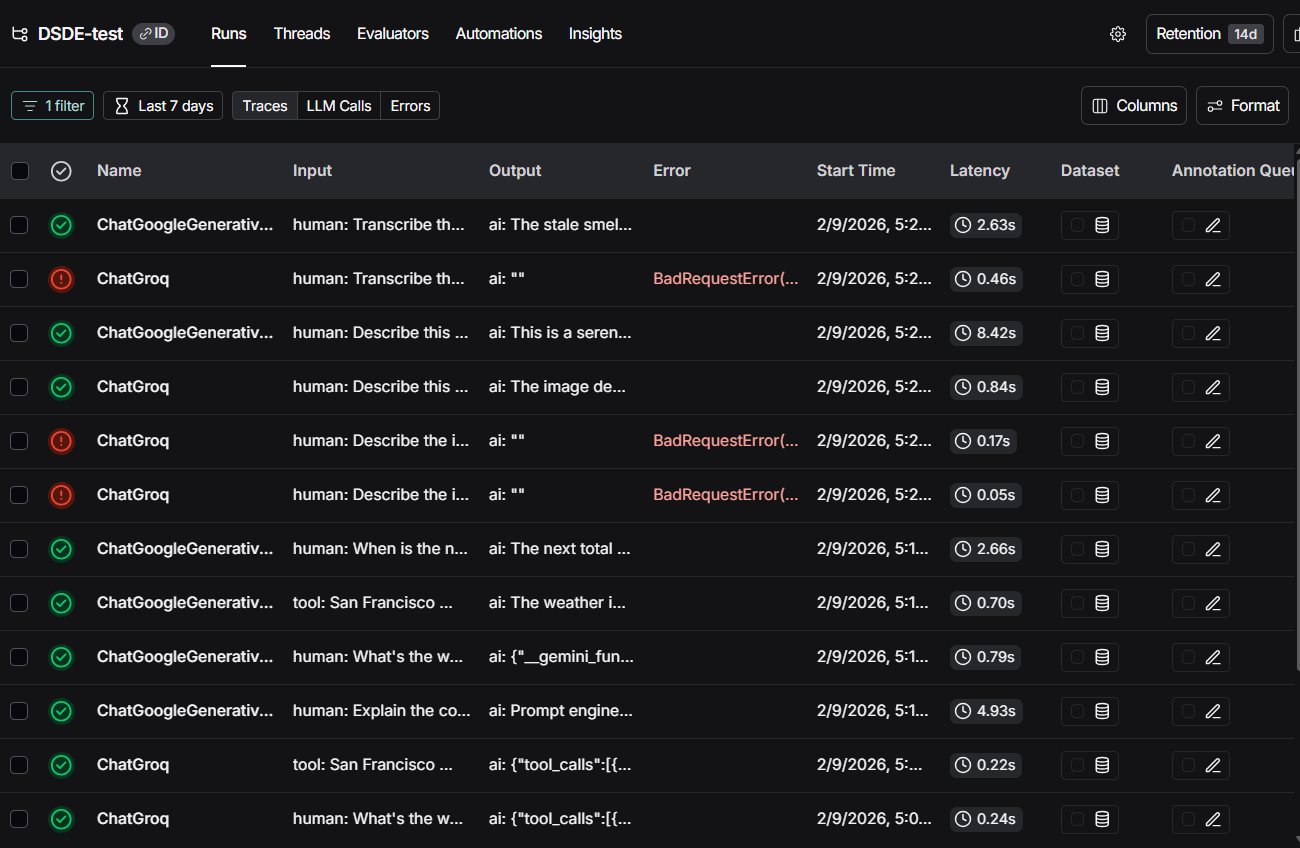